In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
gdp = pd.read_csv('../data/macro/gdp.csv', parse_dates=['Date'], index_col='Date')
cpi = pd.read_csv('../data/macro/cpi.csv', parse_dates=['Date'], index_col='Date')
unemployment = pd.read_csv('../data/macro/unemployment.csv', parse_dates=['Date'], index_col='Date')
fedFunds = pd.read_csv('../data/macro/fedFunds.csv', parse_dates=['Date'], index_col='Date')

macro_df = pd.concat([gdp, cpi, unemployment, fedFunds], axis=1)
macro_df.columns = ['GDP', 'CPI', 'Unemployment', 'FedFunds']

In [75]:
macro_df.head()

,GDP,Inflation,Unemployment,FedFunds,Unemployment_lag3,Unemplyment_rolling6
Date,,,,,,
1954-07-01,2880.482,0.261292,5.8,0.80,NaN,NaN
1954-10-01,2936.852,-0.853432,5.7,0.85,NaN,NaN
1955-01-01,3020.746,-0.631032,4.9,1.39,NaN,NaN
1955-04-01,3069.910,-0.260611,4.7,1.43,5.8,NaN
1955-07-01,3111.379,-0.372301,4.0,1.68,5.7,NaN


In [76]:
gdp.head()

,gdp
Date,
1947-01-01,2182.681
1947-04-01,2176.892
1947-07-01,2172.432
1947-10-01,2206.452
1948-01-01,2239.682


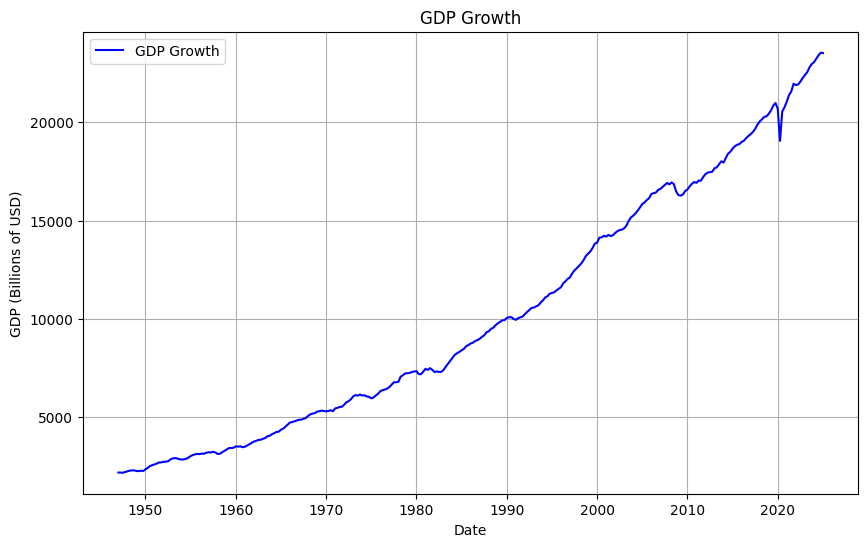

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(gdp, label='GDP Growth', color='blue')
plt.title('GDP Growth')
plt.xlabel('Date')
plt.ylabel('GDP (Billions of USD)')
plt.legend()
plt.grid(True)
plt.show()


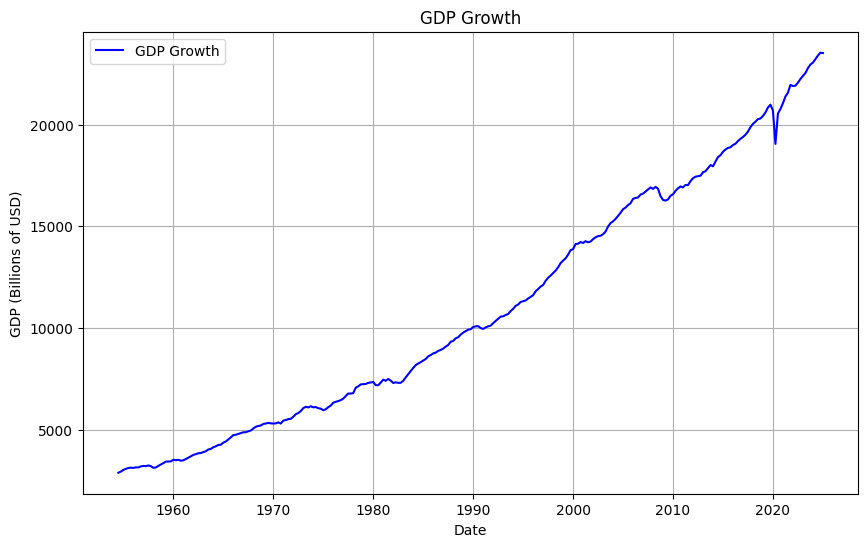

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(macro_df['GDP'], label='GDP Growth', color='blue')
plt.title('GDP Growth')
plt.xlabel('Date')
plt.ylabel('GDP (Billions of USD)')
plt.legend()
plt.grid(True)
plt.show()

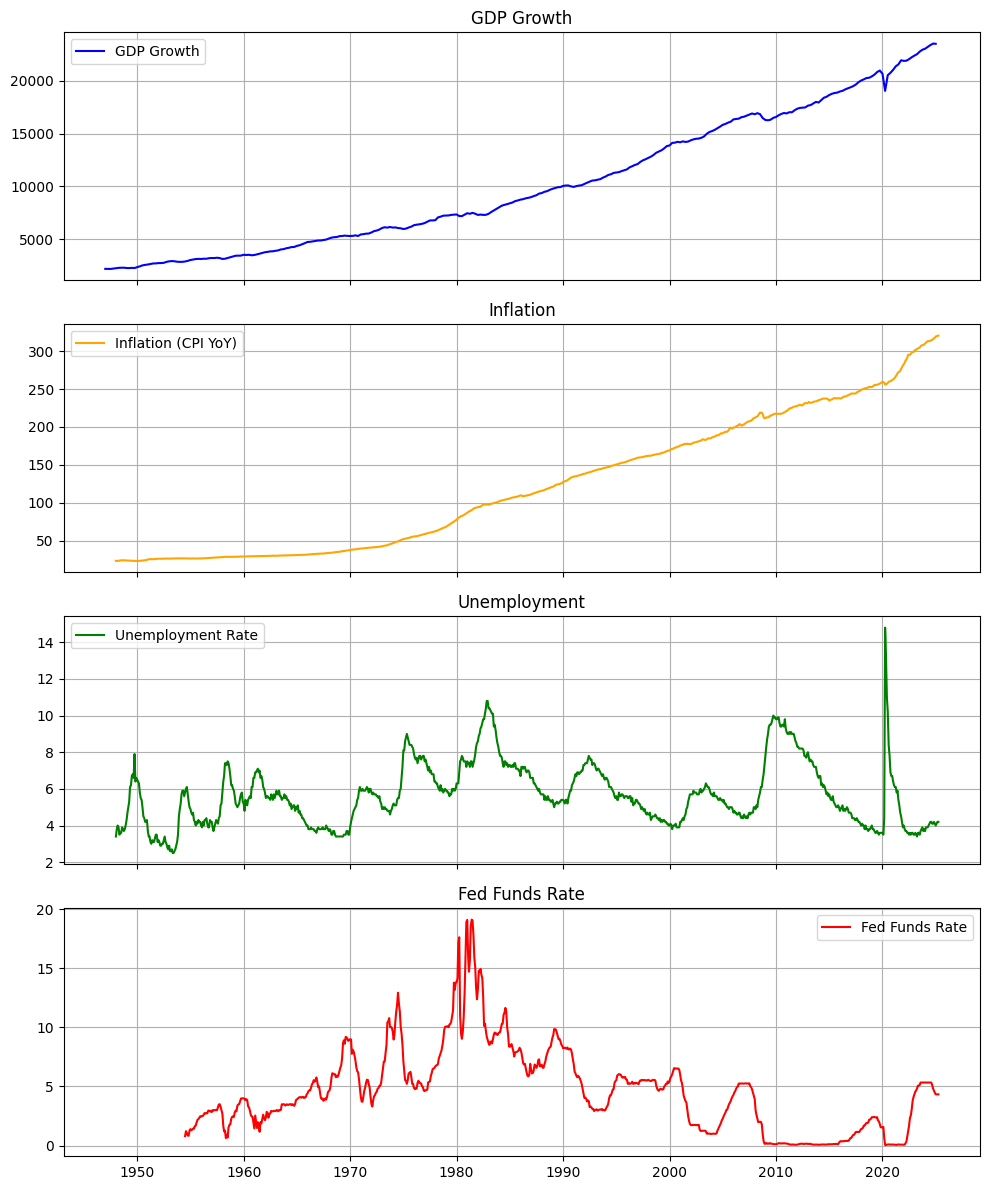

In [82]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axs[0].plot(gdp, label='GDP Growth', color='blue')
axs[0].set_title('GDP Growth')

axs[1].plot(cpi['cpi'], label='Inflation (CPI YoY)', color='orange')
axs[1].set_title('Inflation')

axs[2].plot(unemployment, label='Unemployment Rate', color='green')
axs[2].set_title('Unemployment')

axs[3].plot(fedFunds, label='Fed Funds Rate', color='red')
axs[3].set_title('Fed Funds Rate')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [22]:
macro_df = pd.concat([gdp, cpi, unemployment, fedFunds], axis=1, join='inner')
macro_df.columns = ['GDP', 'CPI', 'Unemployment', 'FedFunds']

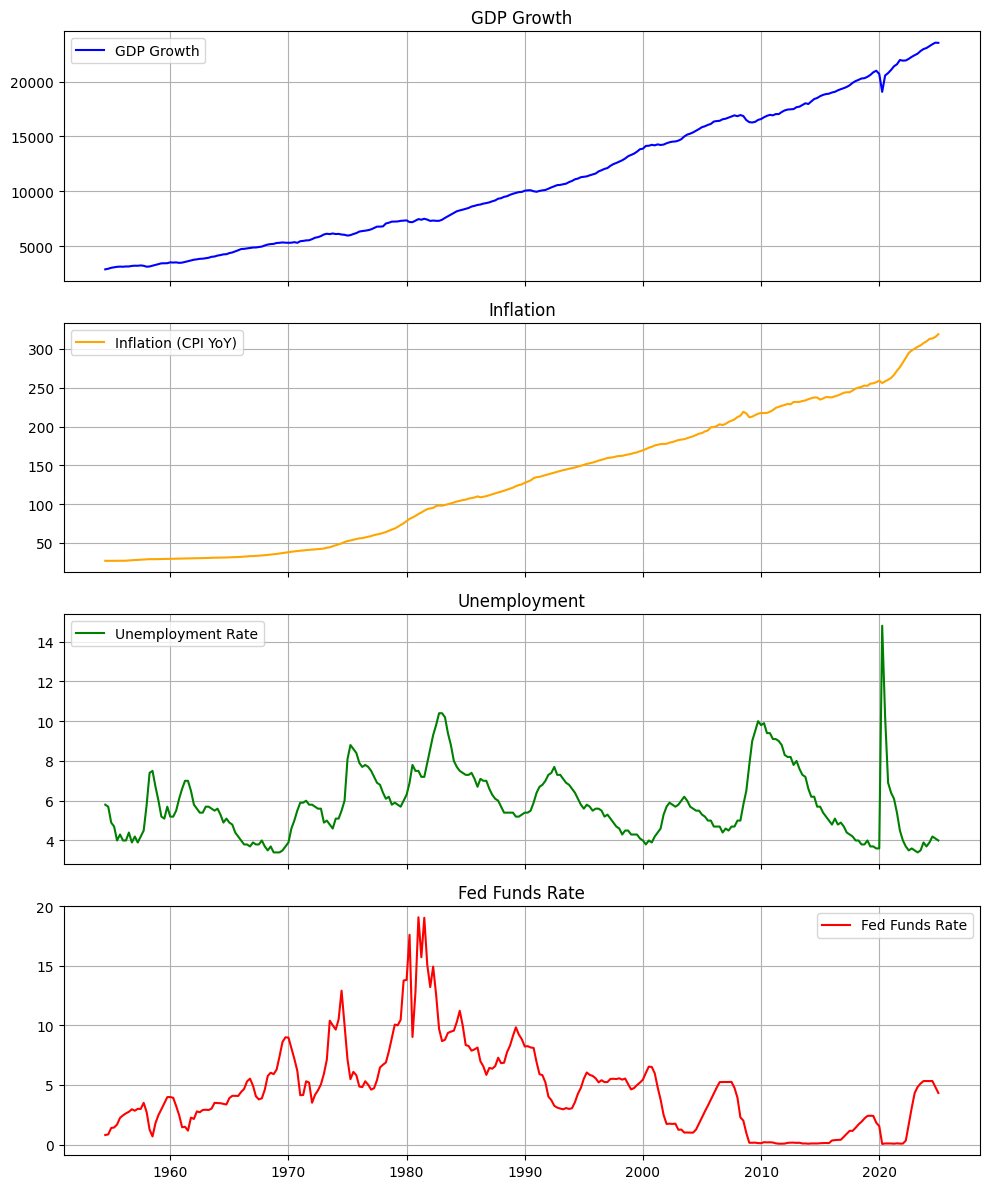

In [23]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axs[0].plot(macro_df['GDP'], label='GDP Growth', color='blue')
axs[0].set_title('GDP Growth')

axs[1].plot(macro_df['CPI'], label='Inflation (CPI YoY)', color='orange')
axs[1].set_title('Inflation')

axs[2].plot(macro_df['Unemployment'], label='Unemployment Rate', color='green')
axs[2].set_title('Unemployment')

axs[3].plot(macro_df['FedFunds'], label='Fed Funds Rate', color='red')
axs[3].set_title('Fed Funds Rate')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()



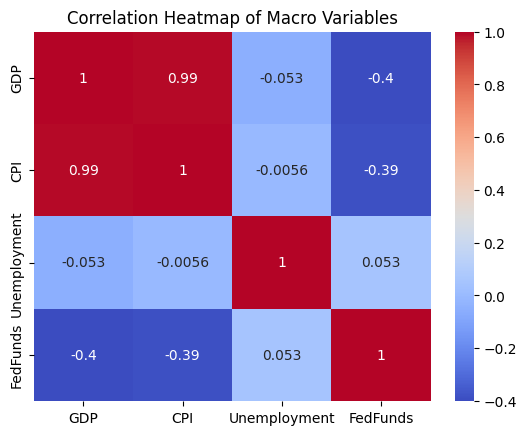

In [24]:
import seaborn as sns

sns.heatmap(macro_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Macro Variables')
plt.show()




In [25]:
cpi.head()

,cpi
Date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


In [26]:
cpi['Inflation'] = cpi['cpi'].pct_change(periods=12) * 100
cpi.head()






,cpi,Inflation
Date,,
1947-01-01,21.48,NaN
1947-02-01,21.62,NaN
1947-03-01,22.00,NaN
1947-04-01,22.00,NaN
1947-05-01,21.95,NaN


In [27]:
cpi

,cpi,Inflation
Date,,
1947-01-01,21.480,NaN
1947-02-01,21.620,NaN
1947-03-01,22.000,NaN
1947-04-01,22.000,NaN
1947-05-01,21.950,NaN
...,...,...
2024-12-01,317.603,2.872366
2025-01-01,319.086,2.999413
2025-02-01,319.775,2.814270


In [28]:
cpi = cpi.dropna()
cpi.head()

,cpi,Inflation
Date,,
1948-01-01,23.68,10.242086
1948-02-01,23.67,9.481961
1948-03-01,23.50,6.818182
1948-04-01,23.82,8.272727
1948-05-01,24.01,9.384966


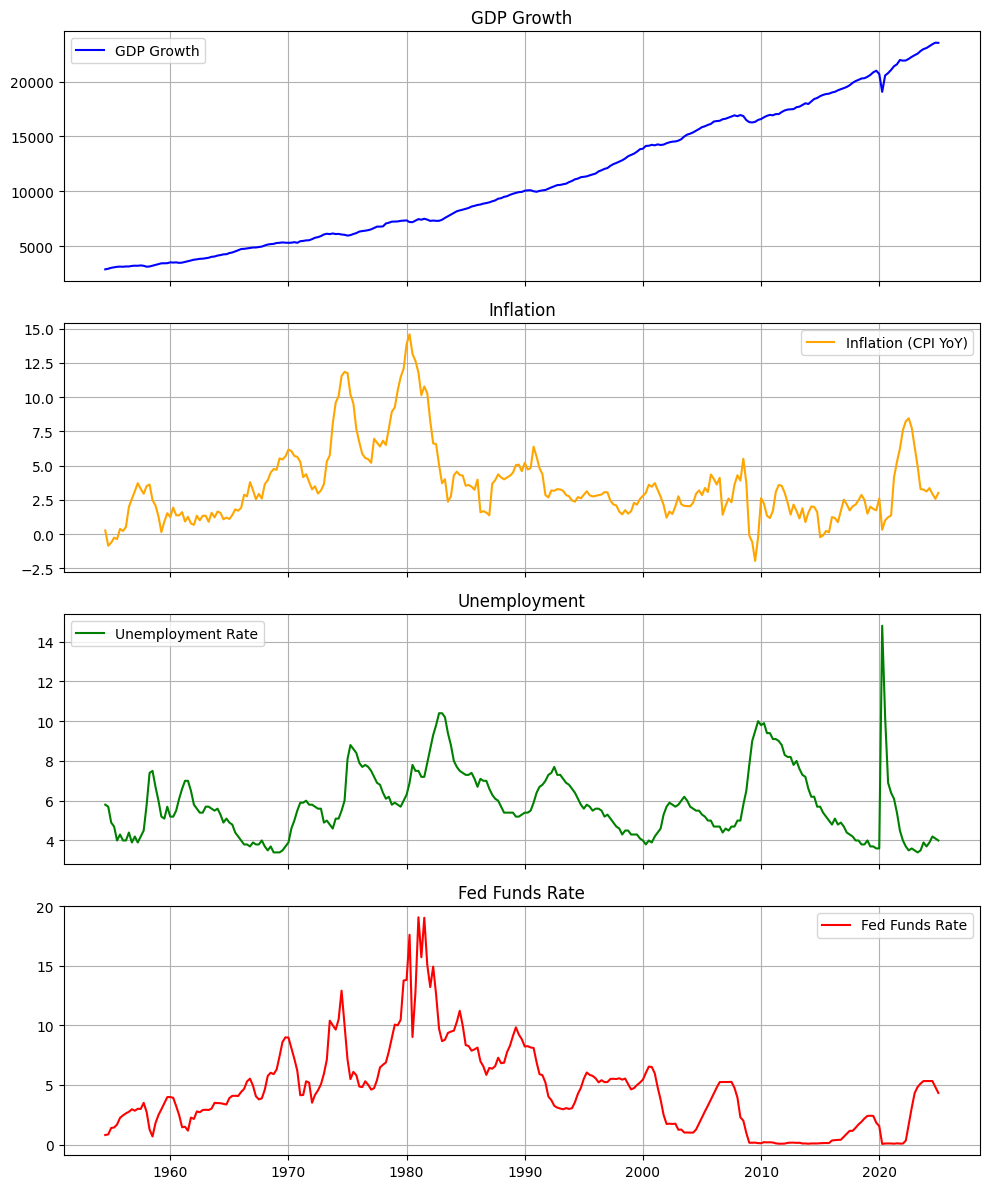

In [ ]:
macro_df = pd.concat([gdp, cpi['Inflation'], unemployment, fedFunds], axis=1, join='inner')
macro_df.columns = ['GDP', 'Inflation', 'Unemployment', 'FedFunds']
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
macros = ['GDP', 'Inflation', 'Unemployment', 'FedFunds']

axs[0].plot(macro_df['GDP'], label='GDP Growth', color='blue')
axs[0].set_title('GDP Growth')

axs[1].plot(macro_df['Inflation'], label='Inflation (CPI YoY)', color='orange')
axs[1].set_title('Inflation')

axs[2].plot(macro_df['Unemployment'], label='Unemployment Rate', color='green')
axs[2].set_title('Unemployment')

axs[3].plot(macro_df['FedFunds'], label='Fed Funds Rate', color='red')
axs[3].set_title('Fed Funds Rate')

for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


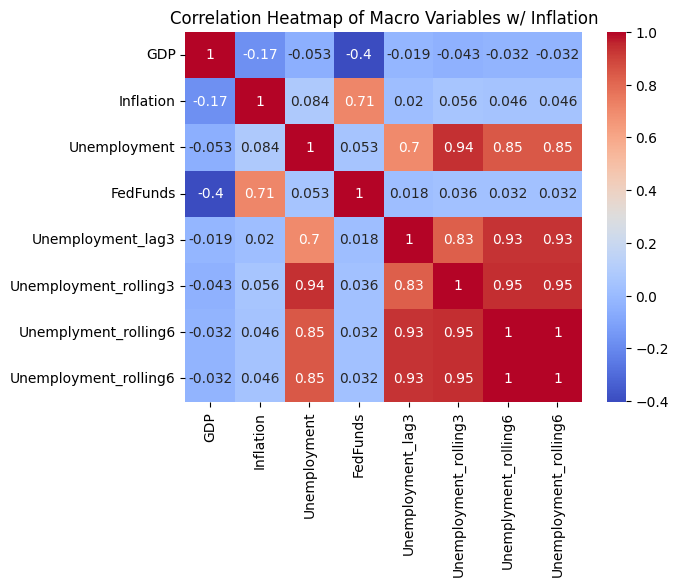

In [36]:
sns.heatmap(macro_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Macro Variables w/ Inflation')
plt.show()


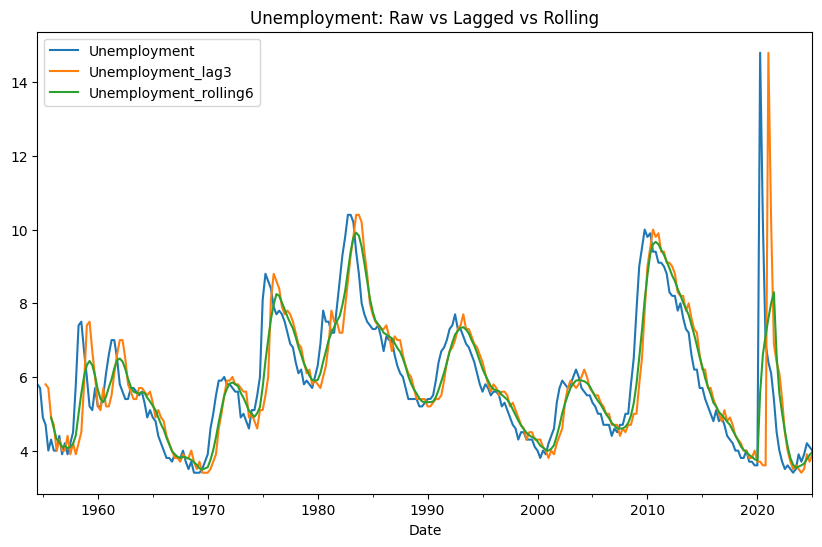

In [34]:
macro_df['Unemployment_lag3'] = macro_df['Unemployment'].shift(3)
macro_df['Unemployment_rolling6'] = macro_df['Unemployment'].rolling(window=6).mean()

macro_df[['Unemployment', 'Unemployment_lag3', 'Unemployment_rolling6']].plot(figsize=(10, 6), title='Unemployment: Raw vs Lagged vs Rolling')
plt.show()



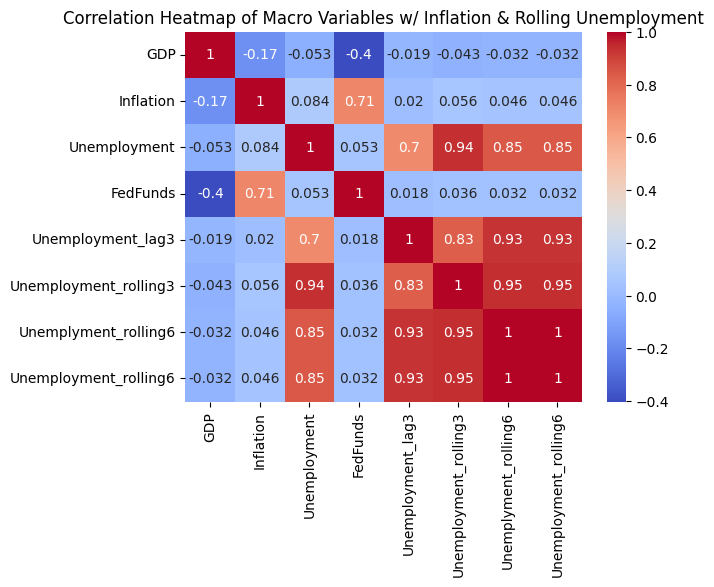

In [35]:
sns.heatmap(macro_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Macro Variables w/ Inflation & Rolling Unemployment')
plt.show()





In [38]:
macro_df = macro_df.drop(columns=['Unemployment_rolling3', 'Unemployment_rolling6'])
macro_df.head()

,GDP,Inflation,Unemployment,FedFunds,Unemployment_lag3,Unemplyment_rolling6
Date,,,,,,
1954-07-01,2880.482,0.261292,5.8,0.80,NaN,NaN
1954-10-01,2936.852,-0.853432,5.7,0.85,NaN,NaN
1955-01-01,3020.746,-0.631032,4.9,1.39,NaN,NaN
1955-04-01,3069.910,-0.260611,4.7,1.43,5.8,NaN
1955-07-01,3111.379,-0.372301,4.0,1.68,5.7,NaN


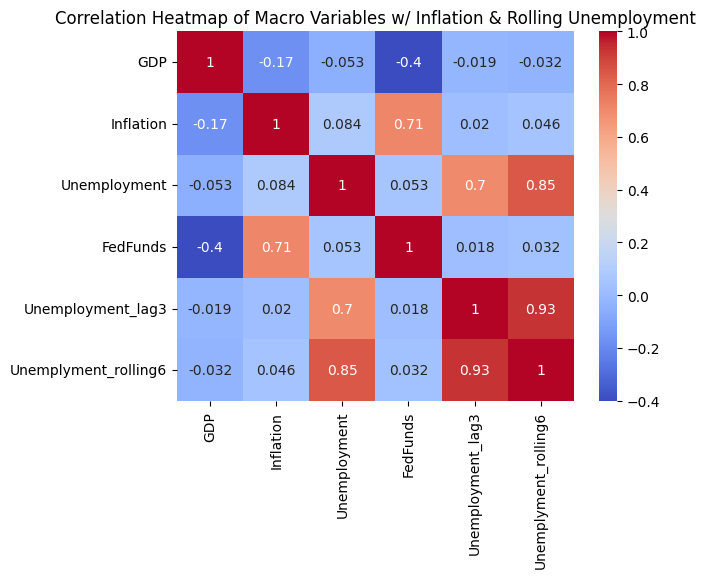

In [39]:
sns.heatmap(macro_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Macro Variables w/ Inflation & Rolling Unemployment')
plt.show()


In [57]:
# PRICE DATA EXPLORATION

adj_close_df = pd.read_csv('../data/prices/adj_close.csv', skiprows=[1], parse_dates=['Date'], index_col='Date')
adj_close_df.head()



,spy,qqq,tlt,gld,hyg,uup
Date,,,,,,
1995-01-01,27.584648,NaN,NaN,NaN,NaN,NaN
1995-02-01,28.710379,NaN,NaN,NaN,NaN,NaN
1995-03-01,29.351023,NaN,NaN,NaN,NaN,NaN
1995-04-01,30.384062,NaN,NaN,NaN,NaN,NaN
1995-05-01,31.589474,NaN,NaN,NaN,NaN,NaN


In [58]:
returns = adj_close_df.pct_change().dropna()
print(returns.head())

                 spy       qqq       tlt       gld       hyg       uup
Date                                                                  
2007-05-01  0.033920  0.031549 -0.023097 -0.023103  0.000947  0.017558
2007-06-01 -0.018849  0.004008 -0.010395 -0.019378 -0.034214 -0.001605
2007-07-01 -0.027135 -0.000689  0.033279  0.023650 -0.039168 -0.009244
2007-08-01  0.012832  0.028192  0.017813  0.011096  0.051355  0.005680
2007-09-01  0.033810  0.051975  0.002098  0.105081  0.029585 -0.029851


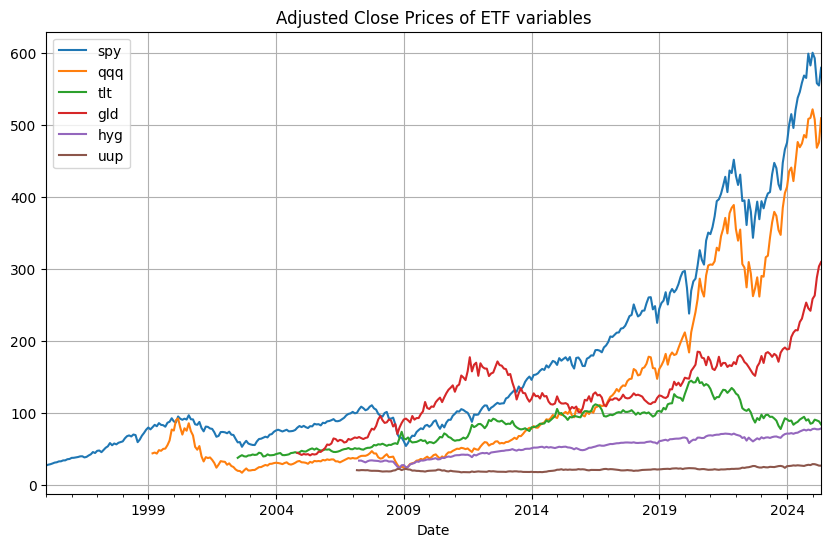

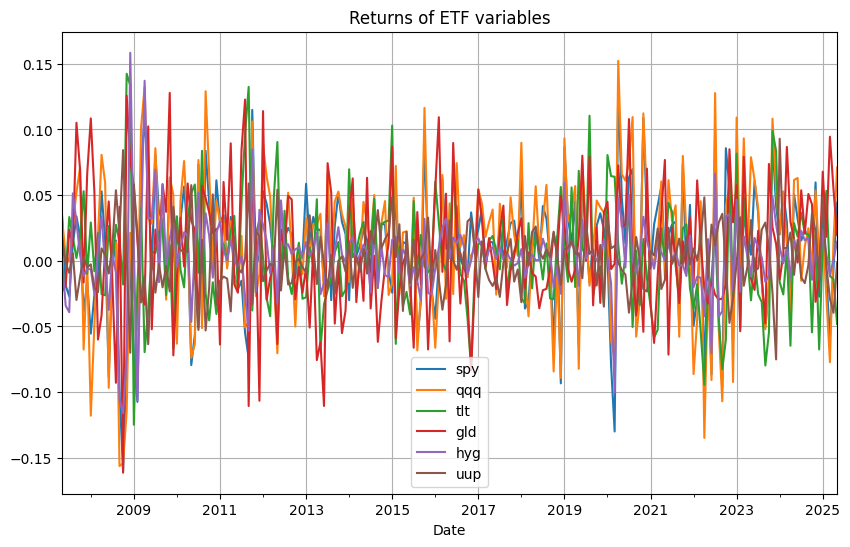

In [59]:
adj_close_df.plot(figsize=(10, 6), title='Adjusted Close Prices of ETF variables')
plt.grid(True)
plt.show()

returns.plot(figsize=(10, 6), title='Returns of ETF variables')
plt.grid(True)
plt.show()



/var/folders/8n/nhys287d66jgg4hjn6n998r80000gn/T/ipykernel_7210/1050887236.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_end_prices = adj_close_df.resample('Y').last()


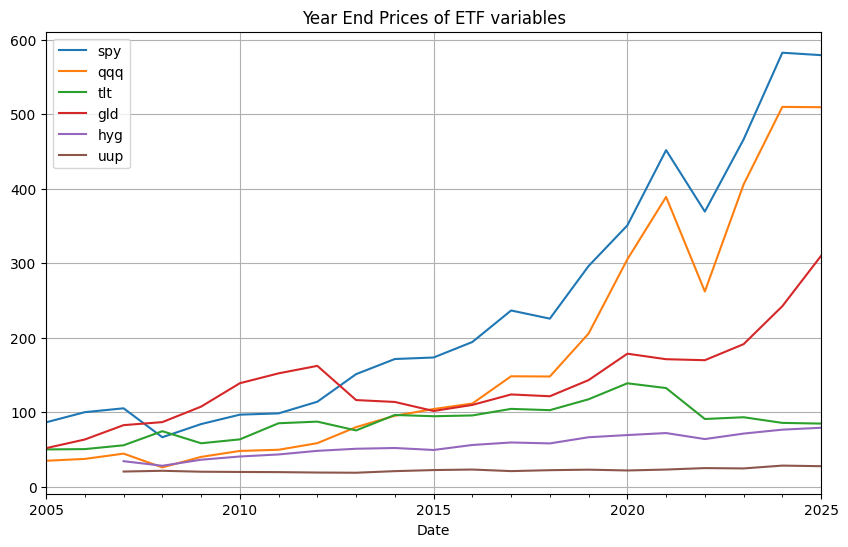

In [52]:
year_end_prices = adj_close_df.resample('Y').last()
year_end_prices.head()

year_end_prices.plot(figsize=(10, 6), title='Year End Prices of ETF variables')
plt.grid(True)
plt.show()

                  spy        qqq        tlt        gld        hyg       uup
Date                                                                       
2008-12-31 -36.971239 -41.751001  34.125395   4.923596 -18.020815  5.046441
2009-12-31  26.695368  54.650635 -21.809061  24.029128  28.998303 -5.892487
2010-12-31  15.070415  20.106153   8.997852  29.270342  12.003784 -1.603118
2011-12-31   1.785297   3.285656  34.161808   9.566035   6.827743 -1.056796
2012-12-31  15.904017  17.907840   2.564930   6.599117  11.240251 -2.937266


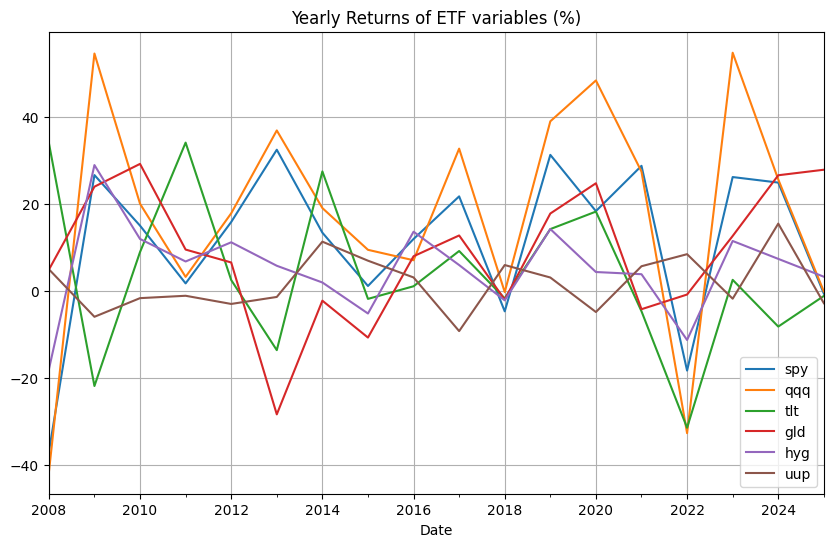

In [62]:
yearly_returns = year_end_prices.pct_change().dropna() * 100
print(yearly_returns.head())

yearly_returns.plot(figsize=(10, 6), title='Yearly Returns of ETF variables (%)')
plt.grid(True)
plt.show()



In [61]:
yearly_returns.describe()

,spy,qqq,tlt,gld,hyg,uup
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,11.655170,17.903816,3.825405,8.729208,5.276647,1.901438
std,18.466582,26.574161,17.634518,15.299852,10.397369,6.455423
min,-36.971239,-41.751001,-31.403011,-28.329836,-18.020815,-9.183666
25%,1.339408,4.241303,-3.912657,-1.648751,2.326295,-2.510106
50%,15.487216,19.611142,1.846774,8.799380,5.924861,1.041918
75%,25.925564,35.914656,13.015130,22.485762,11.465569,5.940396
max,32.526613,54.835453,34.161808,29.270342,28.998303,15.535472


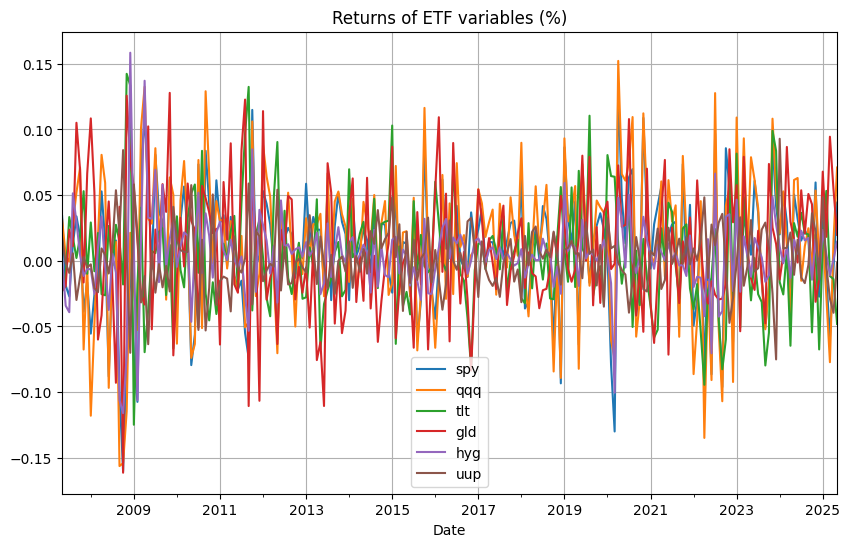

,spy,qqq,tlt,gld,hyg,uup
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.008930,0.013320,0.003166,0.008262,0.004302,0.001552
std,0.045841,0.054438,0.041711,0.048968,0.030384,0.024417
min,-0.160354,-0.156331,-0.124858,-0.161397,-0.116020,-0.075111
25%,-0.016480,-0.017175,-0.024121,-0.022419,-0.009334,-0.014308
50%,0.014772,0.019581,0.002037,0.004564,0.005210,0.001370
75%,0.034738,0.048750,0.024783,0.041121,0.016478,0.016031
max,0.133610,0.152188,0.142347,0.127865,0.158423,0.092914


In [63]:
returns.plot(figsize=(10, 6), title='Returns of ETF variables (%)')
plt.grid(True)
plt.show()

returns.describe()


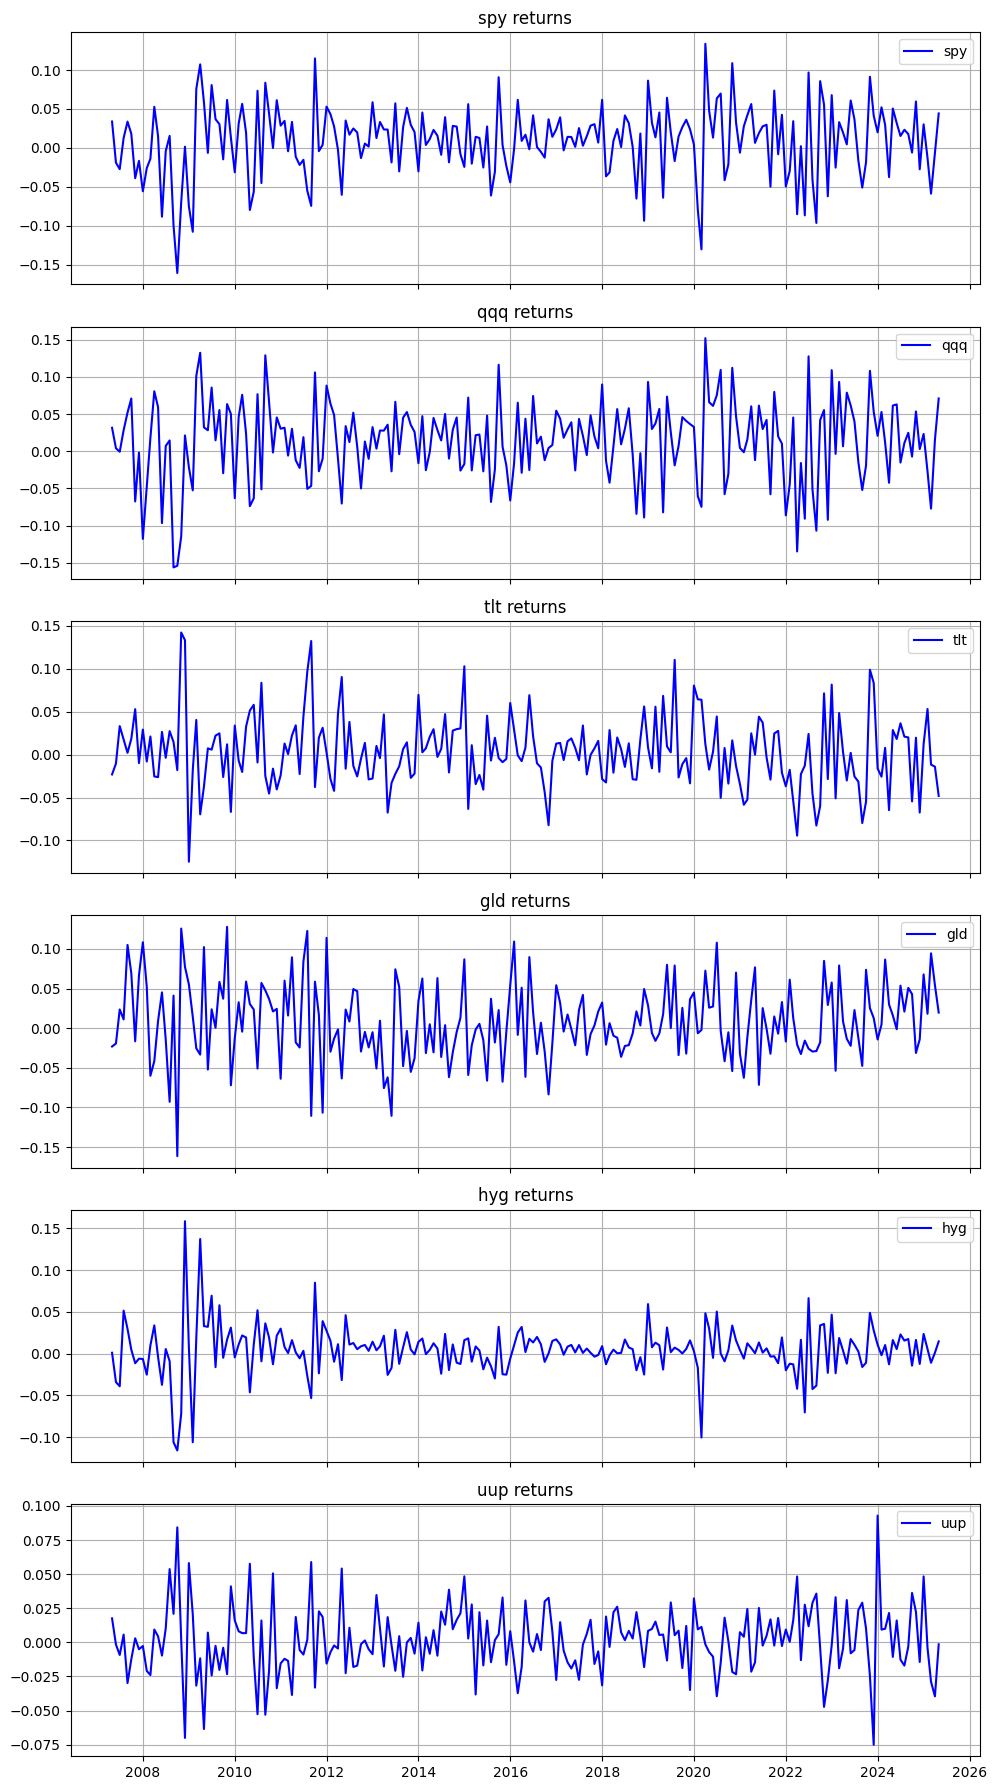

In [70]:
fig, axs = plt.subplots(6, 1, figsize=(10, 18), sharex=True)

for i, ticker in enumerate(returns.columns):
    axs[i].plot(returns[ticker], label=ticker, color='blue')
    axs[i].set_title(f'{ticker} returns')
   
for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


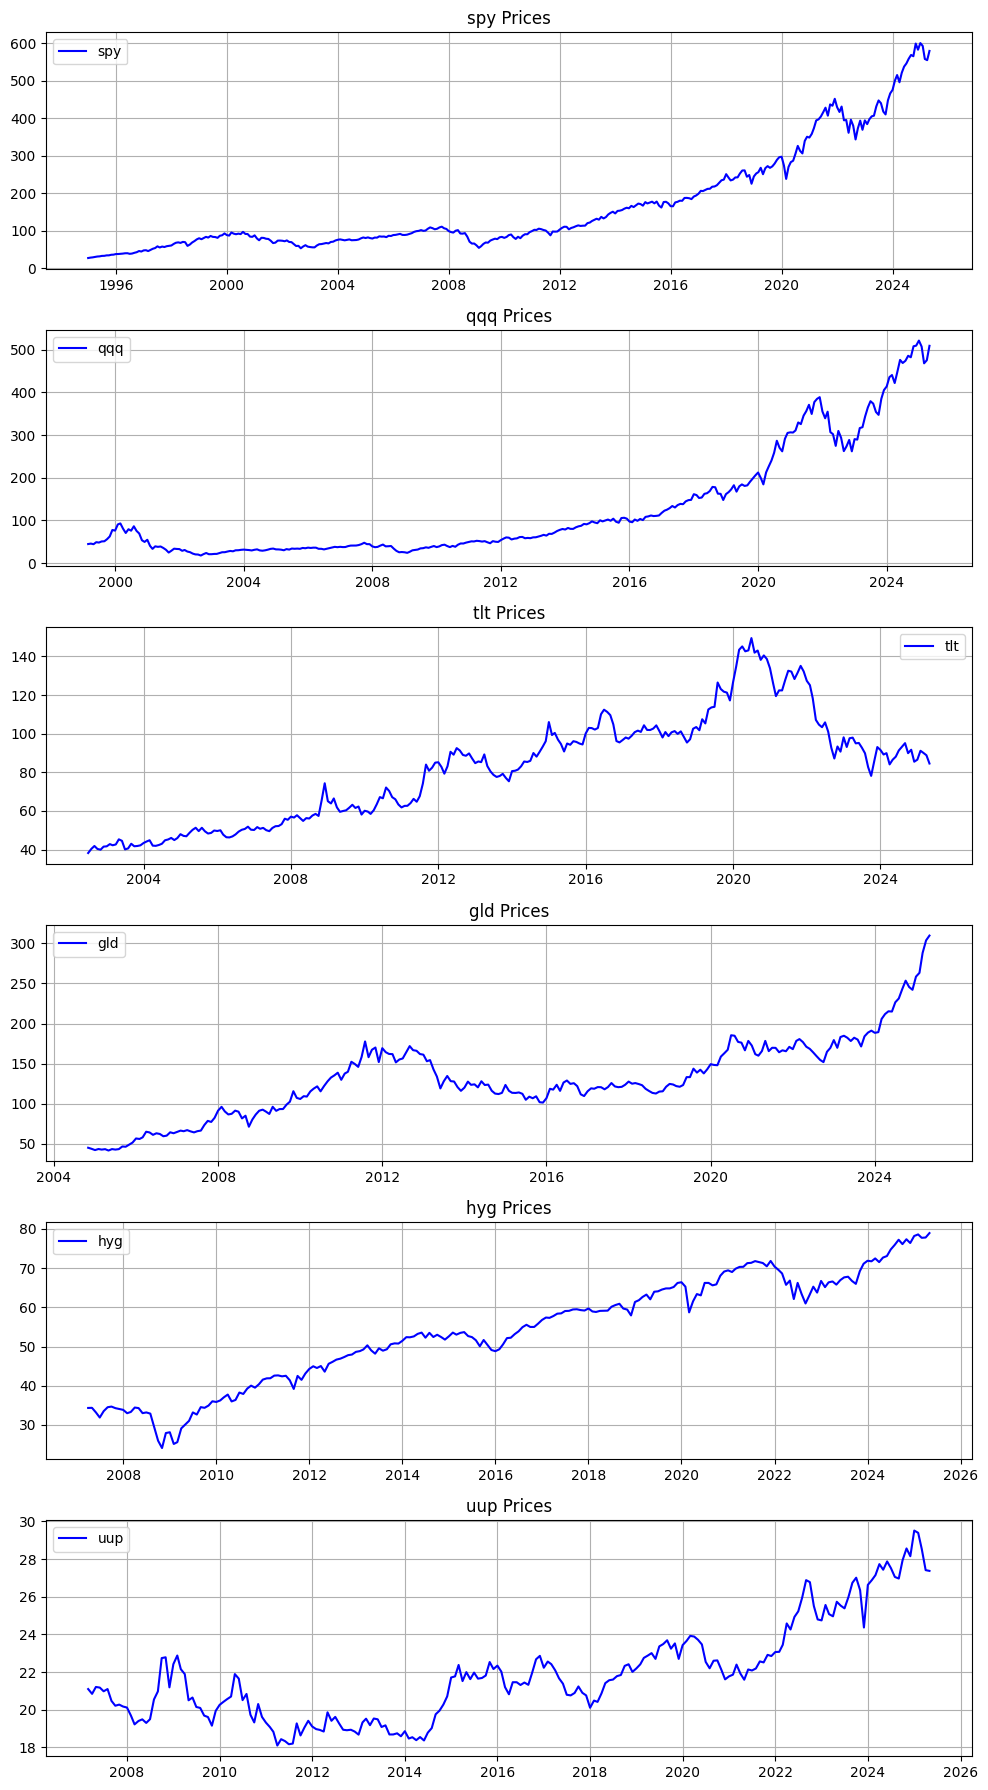

In [71]:
fig, axs = plt.subplots(6, 1, figsize=(10, 18))

for i, ticker in enumerate(adj_close_df.columns):
    axs[i].plot(adj_close_df[ticker], label=ticker, color='blue')
    axs[i].set_title(f'{ticker} Prices')
    
for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()



<Axes: title={'center': 'Yearly Asset Variable Rankings'}, xlabel='Date'>

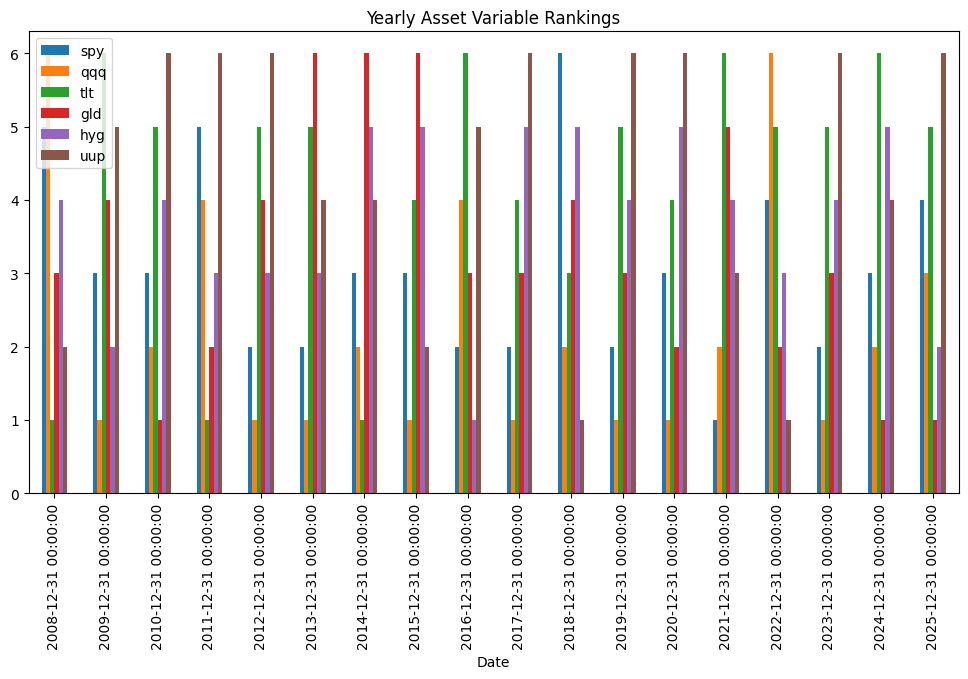

In [83]:
ranked_returns = yearly_returns.rank(axis=1, ascending=False)
ranked_returns.head()

ranked_returns.describe()

ranked_returns.plot(kind='bar', figsize=(12, 6), title='Yearly Asset Variable Rankings')

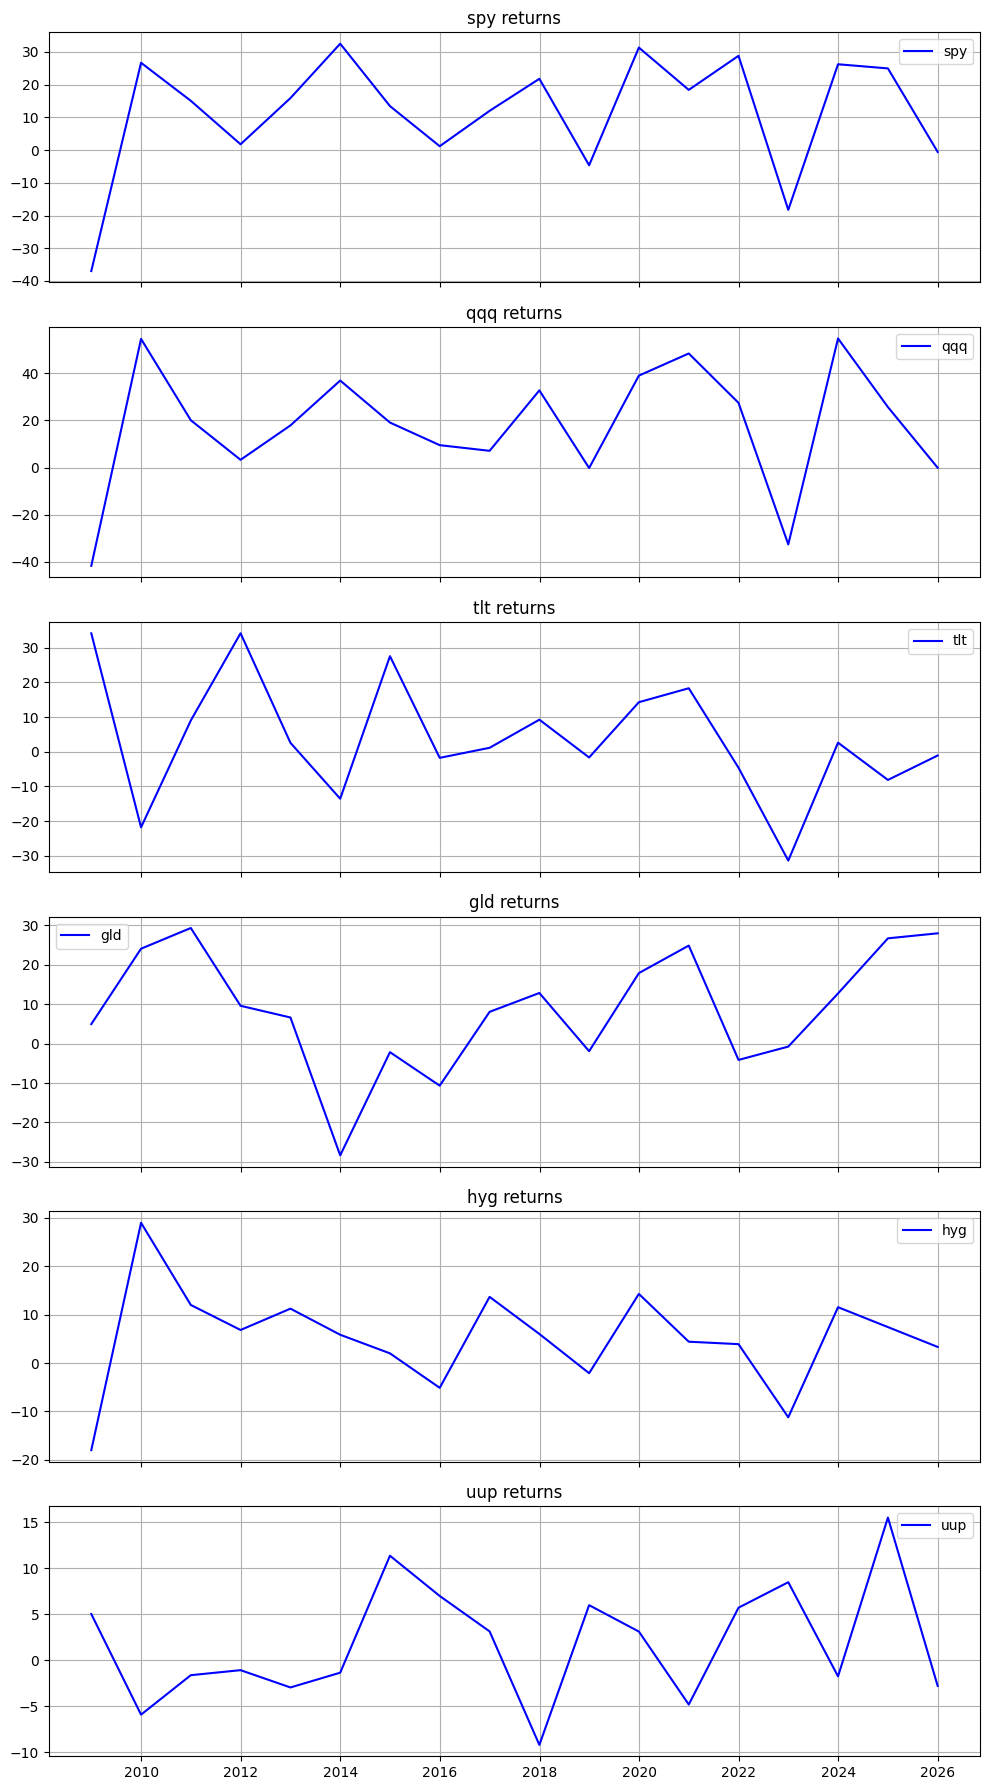

In [84]:
fig, axs = plt.subplots(6, 1, figsize=(10, 18), sharex=True)

for i, ticker in enumerate(yearly_returns.columns):
    axs[i].plot(yearly_returns[ticker], label=ticker, color='blue')
    axs[i].set_title(f'{ticker} returns')
   
for ax in axs:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'spy'}>, <Axes: title={'center': 'qqq'}>,
        <Axes: title={'center': 'tlt'}>],
       [<Axes: title={'center': 'gld'}>, <Axes: title={'center': 'hyg'}>,
        <Axes: title={'center': 'uup'}>]], dtype=object)

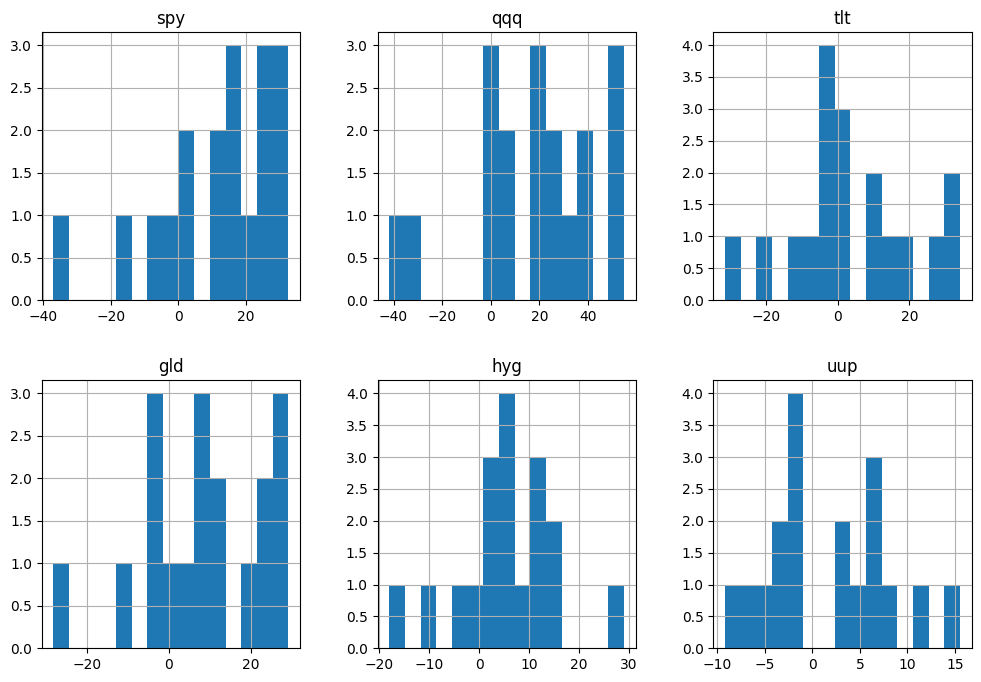

In [85]:
# DISTRIBUTION OF RETURNS PER ASSET

yearly_returns.hist(bins=15, figsize=(12, 8), layout=(2, 3))

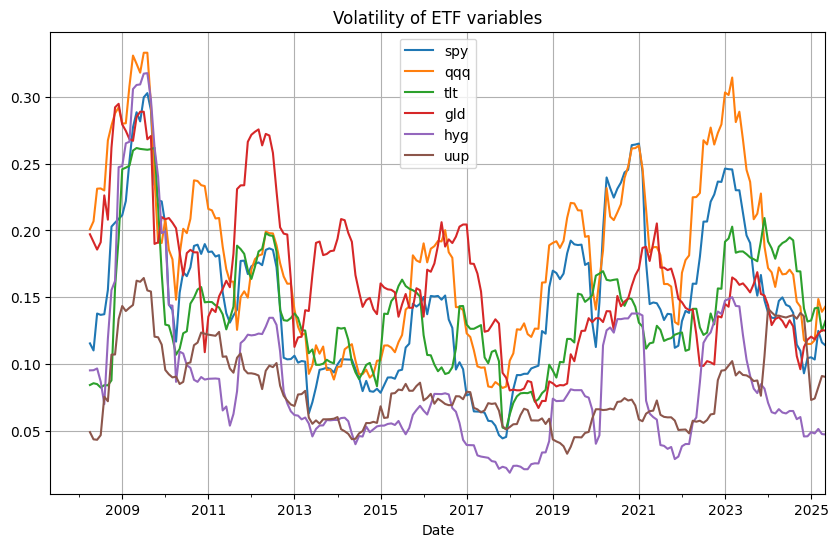

In [86]:
volatility = returns.rolling(window=12).std() * np.sqrt(12)
volatility.head()

volatility.plot(figsize=(10, 6), title='Volatility of ETF variables')
plt.grid(True)
plt.show()


In [87]:
yearly_returns.head()

,spy,qqq,tlt,gld,hyg,uup
Date,,,,,,
2008-12-31,-36.971239,-41.751001,34.125395,4.923596,-18.020815,5.046441
2009-12-31,26.695368,54.650635,-21.809061,24.029128,28.998303,-5.892487
2010-12-31,15.070415,20.106153,8.997852,29.270342,12.003784,-1.603118
2011-12-31,1.785297,3.285656,34.161808,9.566035,6.827743,-1.056796
2012-12-31,15.904017,17.907840,2.564930,6.599117,11.240251,-2.937266


In [89]:
returns.head()

,spy,qqq,tlt,gld,hyg,uup
Date,,,,,,
2007-05-01,0.033920,0.031549,-0.023097,-0.023103,0.000947,0.017558
2007-06-01,-0.018849,0.004008,-0.010395,-0.019378,-0.034214,-0.001605
2007-07-01,-0.027135,-0.000689,0.033279,0.023650,-0.039168,-0.009244
2007-08-01,0.012832,0.028192,0.017813,0.011096,0.051355,0.005680
2007-09-01,0.033810,0.051975,0.002098,0.105081,0.029585,-0.029851


In [90]:
gdp_monthly = gdp.resample('M').ffill()
gdp_monthly.head()

/var/folders/8n/nhys287d66jgg4hjn6n998r80000gn/T/ipykernel_7210/2502889771.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gdp_monthly = gdp.resample('M').ffill()


,gdp
Date,
1947-01-31,2182.681
1947-02-28,2182.681
1947-03-31,2182.681
1947-04-30,2176.892
1947-05-31,2176.892


In [91]:
returns = returns * 100
returns.head()



,spy,qqq,tlt,gld,hyg,uup
Date,,,,,,
2007-05-01,3.392011,3.154862,-2.309692,-2.310323,0.094670,1.755822
2007-06-01,-1.884949,0.400759,-1.039501,-1.937754,-3.421402,-0.160522
2007-07-01,-2.713491,-0.068948,3.327924,2.365029,-3.916833,-0.924434
2007-08-01,1.283243,2.819230,1.781283,1.109585,5.135530,0.567968
2007-09-01,3.380989,5.197495,0.209766,10.508127,2.958472,-2.985091


In [94]:
cpi

,cpi,Inflation
Date,,
1948-01-01,23.680,10.242086
1948-02-01,23.670,9.481961
1948-03-01,23.500,6.818182
1948-04-01,23.820,8.272727
1948-05-01,24.010,9.384966
...,...,...
2024-12-01,317.603,2.872366
2025-01-01,319.086,2.999413
2025-02-01,319.775,2.814270


In [108]:
gdp_monthly.head()

,gdp
Date,
1947-01-31,2182.681
1947-02-28,2182.681
1947-03-31,2182.681
1947-04-30,2176.892
1947-05-31,2176.892


In [116]:
macro_df = pd.DataFrame(index=gdp_monthly.index)
macro_df['GDP'] = gdp_monthly['gdp']

In [119]:
print(cpi.columns)
print(unemployment.columns)
print(fedFunds.columns)

Index(['cpi', 'Inflation'], dtype='object')
Index(['unemployment'], dtype='object')
Index(['fedFunds'], dtype='object')


In [115]:
macro_df['gdp_growth'] = macro_df['GDP'].pct_change(periods=12) * 100

macro_df.head()

/var/folders/8n/nhys287d66jgg4hjn6n998r80000gn/T/ipykernel_7210/4038626930.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  macro_df['gdp_growth'] = macro_df['GDP'].pct_change(periods=12) * 100


,GDP,Inflation,Unemployment,FedFunds,Unemployment_lag3,Unemplyment_rolling6,gdp_growth,Period
Date,,,,,,,,
1947-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
gdp_monthly.index = gdp_monthly.index.to_period('M').to_timestamp()

In [125]:
macro_data = pd.concat([gdp_monthly, cpi, unemployment, fedFunds], axis=1, join='outer')
macro_data.head()

,gdp,cpi,Inflation,unemployment,fedFunds
Date,,,,,
1947-01-01,2182.681,NaN,NaN,NaN,NaN
1947-02-01,2182.681,NaN,NaN,NaN,NaN
1947-03-01,2182.681,NaN,NaN,NaN,NaN
1947-04-01,2176.892,NaN,NaN,NaN,NaN
1947-05-01,2176.892,NaN,NaN,NaN,NaN


In [126]:
macro_data.head(25)

,gdp,cpi,Inflation,unemployment,fedFunds
Date,,,,,
1947-01-01,2182.681,NaN,NaN,NaN,NaN
1947-02-01,2182.681,NaN,NaN,NaN,NaN
1947-03-01,2182.681,NaN,NaN,NaN,NaN
1947-04-01,2176.892,NaN,NaN,NaN,NaN
1947-05-01,2176.892,NaN,NaN,NaN,NaN
1947-06-01,2176.892,NaN,NaN,NaN,NaN
1947-07-01,2172.432,NaN,NaN,NaN,NaN
1947-08-01,2172.432,NaN,NaN,NaN,NaN
1947-09-01,2172.432,NaN,NaN,NaN,NaN


In [130]:
macro_data = macro_data.loc[macro_data.index >= '2007-01-01']
macro_data.head(25)


,gdp,cpi,Inflation,unemployment,fedFunds
Date,,,,,
2007-01-01,16611.690,203.437,2.075765,4.6,5.25
2007-02-01,16611.690,204.226,2.420261,4.5,5.26
2007-03-01,16611.690,205.288,2.798197,4.4,5.26
2007-04-01,16713.314,205.904,2.592925,4.5,5.25
2007-05-01,16713.314,206.755,2.709886,4.4,5.25
2007-06-01,16713.314,207.234,2.692765,4.6,5.25
2007-07-01,16809.587,207.603,2.317891,4.7,5.26
2007-08-01,16809.587,207.667,1.897448,4.6,5.02
2007-09-01,16809.587,208.547,2.833826,4.7,4.94


In [133]:
macro_data['unemployment_rolling6'] = macro_data['unemployment'].rolling(window=6).mean()
macro_data['gdp_growth'] = macro_data['gdp'].pct_change(periods=12) * 100

/var/folders/8n/nhys287d66jgg4hjn6n998r80000gn/T/ipykernel_7210/2152845263.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  macro_data['gdp_growth'] = macro_data['gdp'].pct_change(periods=12) * 100


In [135]:
macro_data.head(25)

,gdp,cpi,Inflation,unemployment,fedFunds,unemployment_rolling6,gdp_growth
Date,,,,,,,
2007-01-01,16611.690,203.437,2.075765,4.6,5.25,NaN,NaN
2007-02-01,16611.690,204.226,2.420261,4.5,5.26,NaN,NaN
2007-03-01,16611.690,205.288,2.798197,4.4,5.26,NaN,NaN
2007-04-01,16713.314,205.904,2.592925,4.5,5.25,NaN,NaN
2007-05-01,16713.314,206.755,2.709886,4.4,5.25,NaN,NaN
2007-06-01,16713.314,207.234,2.692765,4.6,5.25,4.500000,NaN
2007-07-01,16809.587,207.603,2.317891,4.7,5.26,4.516667,NaN
2007-08-01,16809.587,207.667,1.897448,4.6,5.02,4.533333,NaN
2007-09-01,16809.587,208.547,2.833826,4.7,4.94,4.583333,NaN


In [137]:
macro_data = macro_data.dropna(subset=['unemployment_rolling6', 'gdp_growth'])
macro_data.head(25)

,gdp,cpi,Inflation,unemployment,fedFunds,unemployment_rolling6,gdp_growth
Date,,,,,,,
2008-01-01,16843.003,212.174,4.294696,5.0,3.94,4.783333,1.392471
2008-02-01,16843.003,212.687,4.142959,4.9,2.98,4.833333,1.392471
2008-03-01,16843.003,213.448,3.974904,5.1,2.61,4.900000,1.392471
2008-04-01,16943.291,213.942,3.903761,5.0,2.28,4.950000,1.376011
2008-05-01,16943.291,215.208,4.088414,5.4,1.98,5.066667,1.376011
2008-06-01,16943.291,217.463,4.935966,5.6,2.00,5.166667,1.376011
2008-07-01,16854.295,219.016,5.497512,5.8,2.01,5.300000,0.265967
2008-08-01,16854.295,218.690,5.308017,6.1,2.00,5.500000,0.265967
2008-09-01,16854.295,218.877,4.953320,6.1,1.81,5.666667,0.265967


In [140]:
def label_macro_period(row):
    gdp = row['gdp_growth']
    inflation = row['Inflation']

    if gdp < 0:
        return 'Recession'
    elif gdp < 2 and inflation > 3:  # low growth + high inflation
        return 'Stagflation'
    elif gdp > 2 and inflation <= 2: # high growth + low inflation
        return 'Expansion'
    elif gdp > 2 and inflation > 3: # high growth + high inflation
        return 'Overheating'
    elif inflation < 1: # very low inflation regardless of growth
        return 'Disinflation'
    else:
        return 'Moderate Growth'
        

In [141]:
macro_data['Period'] = macro_data.apply(label_macro_period, axis=1)
macro_data.head()




,gdp,cpi,Inflation,unemployment,fedFunds,unemployment_rolling6,gdp_growth,Period
Date,,,,,,,,
2008-01-01,16843.003,212.174,4.294696,5.0,3.94,4.783333,1.392471,Stagflation
2008-02-01,16843.003,212.687,4.142959,4.9,2.98,4.833333,1.392471,Stagflation
2008-03-01,16843.003,213.448,3.974904,5.1,2.61,4.900000,1.392471,Stagflation
2008-04-01,16943.291,213.942,3.903761,5.0,2.28,4.950000,1.376011,Stagflation
2008-05-01,16943.291,215.208,4.088414,5.4,1.98,5.066667,1.376011,Stagflation


In [143]:
macro_data.head(40)

,gdp,cpi,Inflation,unemployment,fedFunds,unemployment_rolling6,gdp_growth,Period
Date,,,,,,,,
2008-01-01,16843.003,212.174,4.294696,5.0,3.94,4.783333,1.392471,Stagflation
2008-02-01,16843.003,212.687,4.142959,4.9,2.98,4.833333,1.392471,Stagflation
2008-03-01,16843.003,213.448,3.974904,5.1,2.61,4.900000,1.392471,Stagflation
2008-04-01,16943.291,213.942,3.903761,5.0,2.28,4.950000,1.376011,Stagflation
2008-05-01,16943.291,215.208,4.088414,5.4,1.98,5.066667,1.376011,Stagflation
2008-06-01,16943.291,217.463,4.935966,5.6,2.00,5.166667,1.376011,Stagflation
2008-07-01,16854.295,219.016,5.497512,5.8,2.01,5.300000,0.265967,Stagflation
2008-08-01,16854.295,218.690,5.308017,6.1,2.00,5.500000,0.265967,Stagflation
2008-09-01,16854.295,218.877,4.953320,6.1,1.81,5.666667,0.265967,Stagflation


In [151]:
volatility.head()

,spy_volatility_volatility,qqq_volatility_volatility,tlt_volatility_volatility,gld_volatility_volatility,hyg_volatility_volatility,uup_volatility_volatility
Date,,,,,,
2007-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-01,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
volatility.columns = [col.replace('_volatility_volatility', '_volatility') for col in volatility.columns]
volatility.head()

,spy_volatility,qqq_volatility,tlt_volatility,gld_volatility,hyg_volatility,uup_volatility
Date,,,,,,
2007-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-01,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
returns.head()

,spy,qqq,tlt,gld,hyg,uup
Date,,,,,,
2007-05-01,3.392011,3.154862,-2.309692,-2.310323,0.094670,1.755822
2007-06-01,-1.884949,0.400759,-1.039501,-1.937754,-3.421402,-0.160522
2007-07-01,-2.713491,-0.068948,3.327924,2.365029,-3.916833,-0.924434
2007-08-01,1.283243,2.819230,1.781283,1.109585,5.135530,0.567968
2007-09-01,3.380989,5.197495,0.209766,10.508127,2.958472,-2.985091


In [159]:
returns.columns = [f"{col}_returns" for col in returns.columns]
returns.head()

,spyreturns_returns,qqqreturns_returns,tltreturns_returns,gldreturns_returns,hygreturns_returns,uupreturns_returns
Date,,,,,,
2007-05-01,3.392011,3.154862,-2.309692,-2.310323,0.094670,1.755822
2007-06-01,-1.884949,0.400759,-1.039501,-1.937754,-3.421402,-0.160522
2007-07-01,-2.713491,-0.068948,3.327924,2.365029,-3.916833,-0.924434
2007-08-01,1.283243,2.819230,1.781283,1.109585,5.135530,0.567968
2007-09-01,3.380989,5.197495,0.209766,10.508127,2.958472,-2.985091


In [160]:
returns.columns = [col.replace('returns_returns', '_returns') for col in returns.columns]
returns.head()

,spy_returns,qqq_returns,tlt_returns,gld_returns,hyg_returns,uup_returns
Date,,,,,,
2007-05-01,3.392011,3.154862,-2.309692,-2.310323,0.094670,1.755822
2007-06-01,-1.884949,0.400759,-1.039501,-1.937754,-3.421402,-0.160522
2007-07-01,-2.713491,-0.068948,3.327924,2.365029,-3.916833,-0.924434
2007-08-01,1.283243,2.819230,1.781283,1.109585,5.135530,0.567968
2007-09-01,3.380989,5.197495,0.209766,10.508127,2.958472,-2.985091


In [161]:
final_df = pd.concat([macro_data, returns, volatility], axis=1, join='inner')
final_df


,gdp,cpi,Inflation,unemployment,fedFunds,unemployment_rolling6,gdp_growth,Period,spy_returns,qqq_returns,tlt_returns,gld_returns,hyg_returns,uup_returns,spy_volatility,qqq_volatility,tlt_volatility,gld_volatility,hyg_volatility,uup_volatility
Date,,,,,,,,,,,,,,,,,,,,
2008-01-01,16843.003,212.174,4.294696,5.0,3.94,4.783333,1.392471,Stagflation,-5.547501,-11.798058,2.916115,10.841623,-0.651435,-0.271830,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01,16843.003,212.687,4.142959,4.9,2.98,4.833333,1.392471,Stagflation,-2.584221,-4.830441,-0.800069,5.229758,-2.528365,-2.090443,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-01,16843.003,213.448,3.974904,5.1,2.61,4.900000,1.392471,Stagflation,-1.382492,1.792742,2.115346,-5.999165,0.979056,-2.396519,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-01,16943.291,213.942,3.903761,5.0,2.28,4.950000,1.376011,Stagflation,5.284896,8.066992,-2.539219,-4.158834,3.370827,0.937498,0.115476,0.200906,0.084322,0.197156,0.095281,0.049043
2008-05-01,16943.291,215.208,4.088414,5.4,1.98,5.066667,1.376011,Stagflation,1.511683,5.930937,-2.627181,0.923249,-0.416256,0.442278,0.110201,0.206876,0.085655,0.191478,0.095398,0.043667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,23542.349,317.603,2.872366,4.1,4.48,4.150000,2.533684,Moderate Growth,-2.733386,0.292317,-6.752412,-1.408849,-1.243717,-1.440542,0.104457,0.115028,0.131859,0.118296,0.045946,0.105737
2025-01-01,23526.085,319.086,2.999413,4.0,4.33,4.116667,2.049750,Moderate Growth,3.031246,2.328140,1.233170,6.785608,2.346957,4.832627,0.105054,0.115080,0.132624,0.120535,0.049022,0.073125
2025-02-01,NaN,319.775,2.814270,4.1,4.33,4.100000,2.049750,Moderate Growth,-1.269479,-2.703472,5.321340,1.821624,0.514290,-0.406645,0.103404,0.117862,0.141712,0.118487,0.048095,0.074238


In [164]:
final_df = final_df.fillna(final_df.mean(numeric_only=True))
final_df.index = pd.to_datetime(final_df.index)

In [165]:
final_df.head()

,gdp,cpi,Inflation,unemployment,fedFunds,unemployment_rolling6,gdp_growth,Period,spy_returns,qqq_returns,tlt_returns,gld_returns,hyg_returns,uup_returns,spy_volatility,qqq_volatility,tlt_volatility,gld_volatility,hyg_volatility,uup_volatility
Date,,,,,,,,,,,,,,,,,,,,
2008-01-01,16843.003,212.174,4.294696,5.0,3.94,4.783333,1.392471,Stagflation,-5.547501,-11.798058,2.916115,10.841623,-0.651435,-0.271830,0.149720,0.179689,0.139481,0.163028,0.088244,0.080638
2008-02-01,16843.003,212.687,4.142959,4.9,2.98,4.833333,1.392471,Stagflation,-2.584221,-4.830441,-0.800069,5.229758,-2.528365,-2.090443,0.149720,0.179689,0.139481,0.163028,0.088244,0.080638
2008-03-01,16843.003,213.448,3.974904,5.1,2.61,4.900000,1.392471,Stagflation,-1.382492,1.792742,2.115346,-5.999165,0.979056,-2.396519,0.149720,0.179689,0.139481,0.163028,0.088244,0.080638
2008-04-01,16943.291,213.942,3.903761,5.0,2.28,4.950000,1.376011,Stagflation,5.284896,8.066992,-2.539219,-4.158834,3.370827,0.937498,0.115476,0.200906,0.084322,0.197156,0.095281,0.049043
2008-05-01,16943.291,215.208,4.088414,5.4,1.98,5.066667,1.376011,Stagflation,1.511683,5.930937,-2.627181,0.923249,-0.416256,0.442278,0.110201,0.206876,0.085655,0.191478,0.095398,0.043667


In [166]:
final_df.to_csv('../data/final_dataset.csv')